In [86]:
import math
import numpy as np

# (x+1)d2f+(x²+3)f = sin(x) 
#A = [[0.] * 4]*4

# Retorna el valor de los coeficientes de cada función segun el paso i 
def func(fun, i):
    val = 0.0
    #vector de posiciones de las x
    x = [i for i, ltr in enumerate(fun) if ltr == 'x']
    #agregar '1' a los coeficientes que son de la forma -x->-1x o x->1x
    for k in x:
        if (k==0):
            fun = '1'+ fun
        try:
            if(fun[k-1].isnumeric()==False):
                fun = fun[:k] + '1' + fun[k:]
        except:
            pass
    x = [i for i, ltr in enumerate(fun) if ltr == 'x']
    for k in x:
        subs = fun[0:k] 
        subs = subs.replace('(',"").replace(')',"").replace('x','')
        if(len(subs)==0):
            val = val + 1 * xi[i]
        else:
            if('-' in subs):
                val = val - int(subs[1:])*xi[i]
            else:
                if('+' in subs):
                    val = val+int(subs[1:])*xi[i]
                if('*' in subs):
                    s = subs.replace('*','')
                    if(len(s)>0):
                        val = val + int(s)*xi[i]
                    else:
                        val = val + 1*xi[i]
                if(len(subs)>2):
                    #no considero funciones, solo el parametro x, ej: sin(x), cos(x)
                    if('sin' in subs):
                        val = val + math.sin(xi[i])
                    if('cos' in subs):
                        val = val + math.cos(xi[i])
                else:
                    s = subs.replace('*','')
                    if(len(s)>0):
                        val = val + int(s)*xi[i]
                    else:
                        val = val + 1*xi[i]
                    
        fun = fun[k+1:]
        
    if(fun.isnumeric()):
        val = val+int(fun)
    else:
        if(len(fun)>0):
            if(fun[0] == '-'):
                val = val - int(fun[1:])
            else:
                if(fun[0] == '+'):
                    val = val + int(fun[1:])
                else:
                    if("*" in subs):
                        s = subs.replace('*','')
                        if(len(s)>0):
                            val = val + int(s)*xi[i]
                        else:
                            val = val + 1*xi[i]
                    else:
                        if('sin' in subs):
                            val = val + math.sin(xi[i])
                        if('cos' in subs):
                            val = val + math.cos(xi[i])
    
    return val

# asigna valor a la celda i,i
def f(i,m):
    A[i][i] = A[i][i] + m
    

def df(i,h,m):
    try:
        A[i][i-1] = A[i][i-1] - m/(2*h)
        A[i][i+1] = A[i][i+1] + m/(2*h)
    except:
        pass
    if(i == 0):
        b[i] = b[i] - m*x0/(2*h)
    if((i+1)== dim-1):
        b[i] = b[i] - m*x1/(2*h)

def d2f(i,h,m):
    try:
        A[i][i-1] = A[i][i-1] + m/(h*h)
        A[i][i]   = A[i][i] - 2*m/(h*h)
        A[i][i+1] = A[i][i+1] + m/(h*h)
    except:
        pass
    if(i == 0):
        b[i] = b[i] - m*x0/(h*h)
    if((i+1)== dim):
        b[i] = b[i] - m*x1/(h*h)


        
#coeficientes de la ecuación
#cd2f = '-1x+4'
#cdf  = '1'
#cf   = '1'
#c    = '0'
cd2f = input("Coeficiente de la segunda derivada: ")
cdf = input("Coeficiente de la primera derivada: ")
cf = input("Coeficiente de la función: ")
c  = input("Coeficiente libre: ")
h = float(input("tamaño paso h: "))
x0 = 0.0
x1 = 1
#x0 = float(input("x(0): "))
#x1 = float(input("x(1): "))
#valores xi del intervalo entre x(0) y x(1) con paso h
xi = [x/10 for x in range(int(h*10),10,int(h*10))]

dim = len(xi)
A = np.zeros((dim,dim))
b = np.zeros((dim))


#generación de sistema
for i in range(dim):
    #b[i] = math.sin(xi[i])
    #d2f(i,h,xi[i]+1)
    #df(i,h,0)
    #f(i,xi[i]**2+3)
    
    b[i] = func(c,i)
    d2f(i,h,func(cd2f,i))
    df(i,h,func(cdf,i))
    f(i,func(cf,i))
    
    
A[0][dim-1] = 0.0 #ajuste ><
    
#redondear

for i in range(dim):
    for j in range(dim):
        A[i][j] = round(A[i][j],3)
        
b = [round(x,3) for x in b]

#solucion sistema
solve = np.linalg.solve(A,b)
solve =[round(x,3) for x in solve]

#output
print("Ecuación: (%s)f'' + (%s)f' + (%s)f = %s"%(cd2f,cdf,cf,c))
print("x0 = %2.2f x1 =%2.2f h =%2.2f"%(x0,x1,h))
print("xi = "+ str(xi))
print("Resultado Matriz:")
print(A)
print("Resultado Coeficientes:")
print(b)
print("Soluciones")
print(solve)


Coeficiente de la segunda derivada: 1
Coeficiente de la primera derivada: 2x
Coeficiente de la función: 0
Coeficiente libre: -x
tamaño paso h: .2
Ecuación: (1)f'' + (2x)f' + (0)f = -x
x0 = 0.00 x1 =1.00 h =0.20
xi = [0.2, 0.4, 0.6, 0.8]
Resultado Matriz:
[[ 0.  1.  0.  0.]
 [-1.  0.  1.  0.]
 [ 0. -1.  0.  1.]
 [ 0.  0. -1.  0.]]
Resultado Coeficientes:
[-0.2, -0.2, -1.2, -0.2]
Soluciones
[0.4, -0.2, 0.2, -1.4]


In [89]:

print(str(int("+3")))

3


Ecuaciones Diferenciales by FCat [2019]
- Ingrese los cuadrados como x*x
- Desfactorice su función. Ej: -(x-1) --> -x+1 

Coeficiente de la segunda derivada: -x+4
Coeficiente de la primera derivada: 1
Coeficiente de la función: 1
Coeficiente libre: 0
tamaño paso h: .1
x(0): 0
x(1): 1
----------------------------------
Ecuación: (-x+4)f'' + (1)f' + (1)f = 0
x0 = 0.00 x1 =1.00 h =0.10
xi = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Resultado Matriz:
[[-779.  395.    0.    0.    0.    0.    0.    0.    0.]
 [ 375. -759.  385.    0.    0.    0.    0.    0.    0.]
 [   0.  365. -739.  375.    0.    0.    0.    0.    0.]
 [   0.    0.  355. -719.  365.    0.    0.    0.    0.]
 [   0.    0.    0.  345. -699.  355.    0.    0.    0.]
 [   0.    0.    0.    0.  335. -679.  345.    0.    0.]
 [   0.    0.    0.    0.    0.  325. -659.  335.    0.]
 [   0.    0.    0.    0.    0.    0.  315. -639.  325.]
 [   0.    0.    0.    0.    0.    0.    0.  305. -619.]]
Resultado Coeficientes:
[0.0, 0

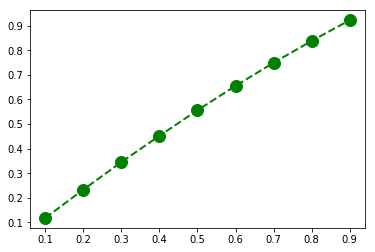

In [10]:
import math
import numpy as np
import matplotlib.pyplot as mp

#corre bien pero no valida todo

# Retorna el valor de los coeficientes de cada función segun el paso i 
def func(fun, i):
    val = 0.0
    parentesis=0.0
    #vector de posiciones de las x
    x = [i for i, ltr in enumerate(fun) if ltr == 'x']
    #agregar '1' a los coeficientes que son de la forma -x->-1x o x->1x
    for k in x:
        if (k==0):
            fun = '1'+ fun
        try:
            if(fun[k-1].isnumeric()==False):
                fun = fun[:k] + '1' + fun[k:]
        except:
            pass
        
    x = [i for i, ltr in enumerate(fun) if ltr == 'x']
    pclose = [i for i, ltr in enumerate(fun) if ltr == ')']
    popen  = [i for i, ltr in enumerate(fun) if ltr == '(']
    p = 0
    
    #calculo de la funcion identificando las x
    for k in x:
        subs = fun[0:k] 
        subs = subs.replace('(',"").replace(')',"").replace('x','')
        # Si hay un * multiplica, sino se asume que es + o -. Si es
        # trigonometrico se lanza al except. Se extrae valor entre paréntesis
        try:
            if('*' in subs):
                subs = subs.replace('*','')
                val = val * int(subs)*xi[i]
            else:
                val = val + int(subs)*xi[i]
        except:
            v = func(fun[popen[p]:pclose[p]+1],i)
            if 'sin' in subs:
                if '-' in subs:
                    val = val - math.sin(v)
                else:
                    val = val + math.sin(v)
            if 'cos' in subs:
                if '-' in subs:
                    val = val - math.cos(v)
                else:
                    val = val + math.cos(v)
        fun = fun[k+1:]
    #para casos en que queda solo un numero lo agregamos
    try:
        val = val + float(fun)
    except:
        pass
        
    return val

# asigna valor a la celda i,i
def f(i,m):
    A[i][i] = A[i][i] + m
    

def df(i,h,m):
    try:
        A[i][i-1] = A[i][i-1] - m/(2*h)
        A[i][i+1] = A[i][i+1] + m/(2*h)
    except:
        pass
    if(i == 0):
        b[i] = b[i] - m*x0/(2*h)
    if((i+1)== dim):
        b[i] = b[i] - m*x1/(2*h)

def d2f(i,h,m):
    try:
        A[i][i-1] = A[i][i-1] + m/(h*h)
        A[i][i]   = A[i][i] - 2*m/(h*h)
        A[i][i+1] = A[i][i+1] + m/(h*h)
    except:
        pass
    if(i == 0):
        b[i] = b[i] - m*x0/(h*h)
    if((i+1)== dim):
        b[i] = b[i] - m*x1/(h*h)
        
#coeficientes de la ecuación
#cd2f = '1'
#cdf  = '2x'
#cf   = '0'
#c    = '-x'
print("Ecuaciones Diferenciales con diferencias finitas de dos puntos by FCat [2019]")
print("- Ingrese los cuadrados como x*x")
print("- Desfactorice su función. Ej: -(x-1) --> -x+1 \n")

dx = int(input("Diferenciación, escriba opción: 1: Centrada | 2: Progresiva | 3: Regresiva"))
cd2f = input("Coeficiente de la segunda derivada: ")
cdf = input("Coeficiente de la primera derivada: ")
cf = input("Coeficiente de la función: ")
c  = input("Coeficiente libre: ")
h = float(input("tamaño paso h: "))
x0 = 0
x1 = 1
x0 = float(input("x(0): "))
x1 = float(input("x(1): "))
#valores xi del intervalo entre x(0) y x(1) con paso h
xi = [x/10 for x in range(int(h*10),10,int(h*10))]

dim = len(xi)
A = np.zeros((dim,dim))
b = np.zeros((dim))


#generación de sistema
for i in range(dim):
    b[i] = func(c,i)
    d2f(i,h,func(cd2f,i))
    df(i,h,func(cdf,i))
    f(i,func(cf,i))
    
    
A[0][dim-1] = 0.0 #ajuste ><
    
#redondear

for i in range(dim):
    for j in range(dim):
        A[i][j] = round(A[i][j],3)
        
b = [round(x,3) for x in b]

#solucion sistema
solve = np.linalg.solve(A,b)
solve =[round(x,3) for x in solve]

#output
print("----------------------------------")
print("Ecuación: (%s)f'' + (%s)f' + (%s)f = %s"%(cd2f,cdf,cf,c))
print("x0 = %2.2f x1 =%2.2f h =%2.2f"%(x0,x1,h))
print("xi = "+ str(xi))
print("Resultado Matriz:")
print(A)
print("Resultado Coeficientes:")
print(b)
print("Soluciones")
print(solve)
mp.plot(xi,solve,color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

In [3]:
import math
import numpy as np
import matplotlib.pyplot as mp

#corre bien pero no valida todo
#version 1.2.1

# Retorna el valor de los coeficientes de cada función segun el paso i 
def func(fun, i):
    val = 0.0
    parentesis=0.0
    #vector de posiciones de las x
    x = [i for i, ltr in enumerate(fun) if ltr == 'x']
    #agregar '1' a los coeficientes que son de la forma -x->-1x o x->1x
    for k in x:
        if (k==0):
            fun = '1'+ fun
        try:
            if(fun[k-1].isnumeric()==False):
                fun = fun[:k] + '1' + fun[k:]
        except:
            pass
        
    x = [i for i, ltr in enumerate(fun) if ltr == 'x']
    pclose = [i for i, ltr in enumerate(fun) if ltr == ')']
    popen  = [i for i, ltr in enumerate(fun) if ltr == '(']
    if(len(pclose)!=len(popen)):
        print("Faltan paréntesis")
        return -1
    else:
        if(len(popen)>0):
            pass
    p = 0
    
    #calculo de la funcion identificando las x
    for k in x:
        subs = fun[0:k] 
        subs = subs.replace('(',"").replace(')',"").replace('x','')
        # Si hay un * multiplica, sino se asume que es + o -. Si es
        # trigonometrico se lanza al except. Se extrae valor entre paréntesis
        try:
            if('*' in subs):
                subs = subs.replace('*','')
                val = val * int(subs)*xi[i]
            else:
                val = val + int(subs)*xi[i]
        except:
            v = func(fun[popen[p]:pclose[p]+1],i)
            if 'sin' in subs:
                if '-' in subs:
                    val = val - math.sin(v)
                else:
                    val = val + math.sin(v)
            if 'cos' in subs:
                if '-' in subs:
                    val = val - math.cos(v)
                else:
                    val = val + math.cos(v)
        fun = fun[k+1:]
    #para casos en que queda solo un numero lo agregamos
    try:
        val = val + float(fun)
    except:
        pass
        
    return val

# asigna valor a la celda i,i
def f(i,m):
    A[i][i] = A[i][i] + m
    

def df(i,h,m):
    try:
        A[i][i-1] = A[i][i-1] - m/(2*h)
        A[i][i+1] = A[i][i+1] + m/(2*h)
    except:
        pass
    if(i == 0):
        b[i] = b[i] - m*x0/(2*h)
    if((i+1)== dim-1):
        b[i] = b[i] - m*x1/(2*h)

def d2f(i,h,m):
    try:
        A[i][i-1] = A[i][i-1] + m/(h*h)
        A[i][i]   = A[i][i] - 2*m/(h*h)
        A[i][i+1] = A[i][i+1] + m/(h*h)
    except:
        pass
    if(i == 0):
        b[i] = b[i] - m*x0/(h*h)
    if((i+1)== dim):
        b[i] = b[i] - m*x1/(h*h)
        
#coeficientes de la ecuación
#cd2f = '1'
#cdf  = '2x'
#cf   = '0'
#c    = '-x'
print("- Ingrese los cuadrados como x*x")
cd2f = input("Coeficiente de la segunda derivada: ")
cdf = input("Coeficiente de la primera derivada: ")
cf = input("Coeficiente de la función: ")
c  = input("Coeficiente libre: ")
h = float(input("tamaño paso h: "))
x0 = 0
x1 = 1
x0 = float(input("x(0): "))
x1 = float(input("x(1): "))
#valores xi del intervalo entre x(0) y x(1) con paso h
xi = [x/10 for x in range(int(h*10),10,int(h*10))]

dim = len(xi)
A = np.zeros((dim,dim))
b = np.zeros((dim))


#generación de sistema
for i in range(dim):
    b[i] = func(c,i)
    d2f(i,h,func(cd2f,i))
    df(i,h,func(cdf,i))
    f(i,func(cf,i))
    
    
A[0][dim-1] = 0.0 #ajuste ><
    
#redondear

for i in range(dim):
    for j in range(dim):
        A[i][j] = round(A[i][j],3)
        
b = [round(x,3) for x in b]

#solucion sistema
solve = np.linalg.solve(A,b)
solve =[round(x,3) for x in solve]

#output
print("----------------------------------")
print("Ecuación: (%s)f'' + (%s)f' + (%s)f = %s"%(cd2f,cdf,cf,c))
print("x0 = %2.2f x1 =%2.2f h =%2.2f"%(x0,x1,h))
print("xi = "+ str(xi))
print("Resultado Matriz:")
print(A)
print("Resultado Coeficientes:")
print(b)
print("Soluciones")
print(solve)
mp.plot(xi,solve,color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

Ecuaciones Diferenciales by FCat [2019]
- Ingrese los cuadrados como x*x
- Ingrese las funciones trigonometricas con sus respectivos paréntesis: sin(2x+1), cos(x)

Ingrese variable [x,t,u,w,..]: x
Coeficiente de la segunda derivada: x*x-2


IndexError: list index out of range

In [4]:
import math
import numpy as np
import matplotlib.pyplot as mp

# Retorna el valor de los coeficientes de cada función segun el paso i 
def func(fun, i):
    val = 0.0
    funorig = fun
    #vector de posiciones de las x
    x = [i for i, ltr in enumerate(fun) if ltr == variable]
    #agregar '1' a los coeficientes de las variables: -x->-1x o x->1x
    for i in range(len(x)):
        k = x[i]
        if (k==0):
            fun = '1'+ fun
        else:
            try:
                if(fun[k-1].isnumeric()==False):
                    fun = fun[:k] + '1' + fun[k:]
            except:
                pass
        x = [i for i, ltr in enumerate(fun) if ltr == variable]
        
    
    pclose = [i for i, ltr in enumerate(fun) if ltr == ')']
    popen  = [i for i, ltr in enumerate(fun) if ltr == '(']
    p = 0
    if(len(popen)!=len(pclose)):
        print("[!]Su función '%s' le faltan paréntesis, reingrese función dependiente de '%s'."%
                  (funorig,variable))
        return -1
    
    #calculo de la funcion identificando las x
    for i in range(len(x)):
        if(i==0):
            subs = fun[0:x[i]+1]
        else:
            subs = fun[x[i-1]:x[i]+1]
        subs = subs.replace('(',"").replace(')',"").replace(variable,'')
        # Si hay un * multiplica, sino se asume que es + o -. Si es
        # trigonometrico se lanza al except.
        try: 
            if('*' in subs):
                subs = subs.replace('*','')
                val = val * float(subs)*xi[i]
            else:
                val = val + float(subs)*xi[i]
        except ValueError:
            if(len(popen)==len(pclose)):
                v = func(fun[popen[p]+1:pclose[p]],i)
                p = p+1
                if 'sin' in subs:
                    if '-' in subs:
                        val = val - math.sin(v)
                    else:
                        val = val + math.sin(v)
                if 'cos' in subs:
                    if '-' in subs:
                        val = val - math.cos(v)
                    else:
                        val = val + math.cos(v)
                if 'tan' in subs:
                    if '-' in subs:
                        val = val - math.tan(v)
                    else:
                        val = val + math.tan(v)
            else:
                print("[!]Su función '%s' está mal tipeada, reingrese función dependiente de '%s'."%
                  (funorig,variable))
                return -1
    #sumar el resto de la función:
    if(len(x)>0):
        fun = fun[x[len(x)-1] + 1:].replace(')',"")
        if(fun !=""):
            if(isfloat(fun)==False):
                print("[!]Su función '%s' está mal tipeada, reingrese función dependiente de '%s'."%
                  (funorig,variable))
                return -1
            else:
                val = val + float(fun)
                
        
    return val

def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
    
# asigna valor a la celda i,i
def f(i,m):
    A[i][i] = A[i][i] + m
    

def df(i,h,m):
    try:
        A[i][i-1] = A[i][i-1] - m/(2*h)
        A[i][i+1] = A[i][i+1] + m/(2*h)
    except:
        pass
    if(i == 0):
        b[i] = b[i] - m*x0/(2*h)
    if((i+1)== dim-1):
        b[i] = b[i] - m*x1/(2*h)

def d2f(i,h,m):
    try:
        A[i][i-1] = A[i][i-1] + m/(h*h)
        A[i][i]   = A[i][i] - 2*m/(h*h)
        A[i][i+1] = A[i][i+1] + m/(h*h)
    except:
        pass
    if(i == 0):
        b[i] = b[i] - m*x0/(h*h)
    if((i+1)== dim):
        b[i] = b[i] - m*x1/(h*h)
        
#coeficientes de la ecuación
print("Ecuaciones Diferenciales by FCat [2019]")
print("- Ingrese los cuadrados como x*x")
print("- Ingrese las funciones trigonometricas con sus respectivos paréntesis: sin(2x+1), cos(x)\n")

variable = input("Ingrese variable [x,t,u,w,..]: ")
cd2f = input("Coeficiente de la segunda derivada: ")
while(func(cd2f,1)==-1):
    cd2f = input("Coeficiente de la segunda derivada: ")
cdf = input("Coeficiente de la primera derivada: ")
while(func(cdf,1)==-1):
    cdf = input("Coeficiente de la primera derivada: ")
cf = input("Coeficiente de la función: ")
while(func(cf,1)==-1):
    cf = input("Coeficiente de la función: ")
c  = input("Coeficiente libre: ")
while(func(c,1)==-1):
    c = input("Coeficiente libre: ")
hinput = input("tamaño paso h: ")
while(isfloat(hinput)==False or float(hinput)<=0):
    print("El tamaño de paso debe ser mayor a cero")
    hinput = input("tamaño paso h: ")
h = float(hinput)
inputx = input("x(0): ")
while(isfloat(inputx)==False):
    inputx = input("x(0): ")
x0 = float(inputx)
inputx = input("x(1): ")
while(isfloat(inputx)==False):
    inputx = input("x(1): ")
x1 = float(inputx)

#valores xi del intervalo entre x(0) y x(1) con paso h
xi = [x/10 for x in range(int(h*10),10,int(h*10))]

dim = len(xi)
A = np.zeros((dim,dim))
b = np.zeros((dim))


#generación de sistema
for i in range(dim):
    b[i] = func(c,i)
    d2f(i,h,func(cd2f,i))
    df(i,h,func(cdf,i))
    f(i,func(cf,i))
    
    
A[0][dim-1] = 0.0 #ajuste ><
    
#redondear

for i in range(dim):
    for j in range(dim):
        A[i][j] = round(A[i][j],3)
        
b = [round(x,3) for x in b]

#solucion sistema
solve = np.linalg.solve(A,b)
solve =[round(x,3) for x in solve]

#output
print("--------------------------------------")
print("Ecuación: (%s)f'' + (%s)f' + (%s)f = %s"%(cd2f,cdf,cf,c))
print("x0 = %2.2f x1 =%2.2f h =%2.2f"%(x0,x1,h))
print("xi = "+ str(xi))
print("Resultado Matriz:")
print(A)
print("Resultado Coeficientes:")
print(b)
print("Soluciones")
print(solve)

mp.plot(xi,solve,color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
        

Ecuaciones Diferenciales by FCat [2019]
- Ingrese los cuadrados como x*x
- Ingrese las funciones trigonometricas con sus respectivos paréntesis: sin(2x+1), cos(x)

Ingrese variable [x,t,u,w,..]: x
Coeficiente de la segunda derivada: 2x


NameError: name 'xi' is not defined